In [ ]:
import sys
!{sys.executable} -m pip install tensorflow==2.17.0


In [ ]:
!pip install pandas
!pip install matplotlib

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [12]:
raw_dataset = keras.datasets.fashion_mnist

In [15]:
(train_images, train_labels), (test_images, test_labels) = raw_dataset.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [20]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

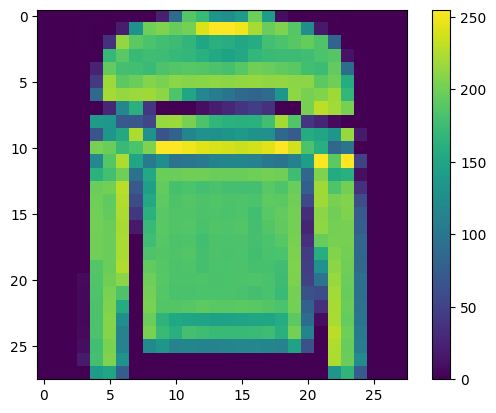

In [ ]:
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preprocessing

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

Defining and Building the model

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Flatten(
            input_shape=(28, 28)
        ),  # input layer and flatten as it is a 28 by 28 matrice (28 by 28 pixels)
        keras.layers.Dense(128, activation="relu"),  # hidden layer
        keras.layers.Dense(10, activation="softmax"),  # output layer
    ]
)

Compiling the model

In [ ]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

Training the model

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8249 - loss: 0.4992
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8645 - loss: 0.3757
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8777 - loss: 0.3378
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8859 - loss: 0.3120
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8906 - loss: 0.2948


Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("Test accuracy is: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8761 - loss: 0.3481
Test accuracy is:  0.8761000037193298


Making predictions

In [50]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step


In [ ]:
print(
    predictions[0]
)  # just for first test image, each printed value is actually the probability that this specific image belong to each of the 10 classes, and the sum of probabilities would be 1

[7.4743330e-05 5.6541825e-07 1.6317506e-06 2.4230030e-06 2.4797253e-06
 2.7374923e-02 1.1382523e-05 9.0823852e-02 9.7815675e-05 8.8161027e-01]


In [53]:
np.argmax(predictions[0])

9

In [54]:
test_labels[0]

9

To visually see the images and predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


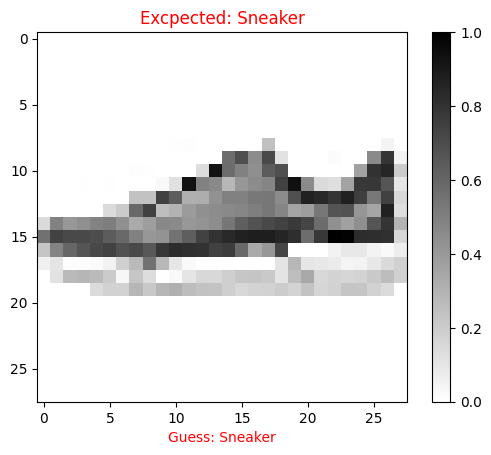

In [ ]:
COLOR = "red"
plt.rcParams["text.color"] = COLOR
plt.rcParams["axes.labelcolor"] = COLOR


def predict(model, image, correct_label):
    class_names = [
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot",
    ]
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")


num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

Source:

FreeCodeCamp TensorFlow tutorial: https://www.freecodecamp.org/learn/machine-learning-with-python/tensorflow/neural-networks-creating-a-model